# **plotting and analysing the fivemer results**

In [4]:
library(ggplot2) 
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [1]:
data <- read.csv("data/fivemer_sims/nonCoding/dataframe_fivemer_results_summary_2022_01_04.csv")

In [5]:
data <- data %>% 
    mutate(fivemer_stderr_upper = fivemer_av_count+fivemer_stderr) %>%
    mutate(fivemer_stderr_lower = fivemer_av_count-fivemer_stderr)


Saving 6.67 x 6.67 in image


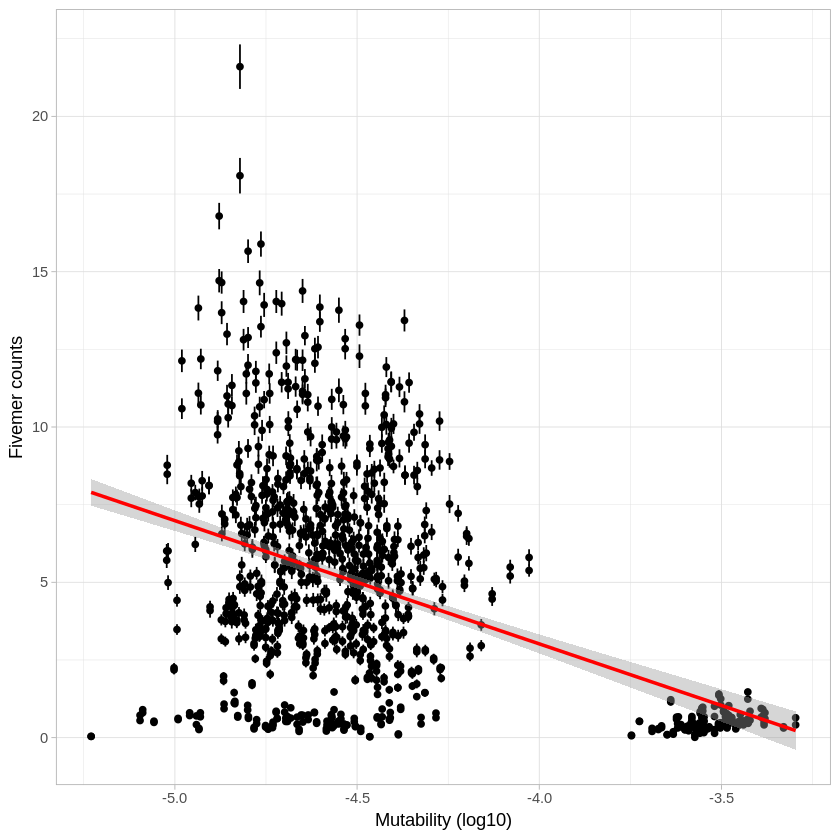

In [15]:
ggplot(data,aes(x=fivemer_log10muts,y=fivemer_av_count))+
    theme_light()+
    geom_point()+
    labs(
        x ="Mutability (log10)", 
        y = "Fivemer counts")+
    geom_errorbar(aes(ymin=fivemer_stderr_lower, ymax=fivemer_stderr_upper))+
    stat_smooth(method="lm",formula=y~x, col = "red")
# ggsave("plots/Scatter_2022_01_04_fivemer_nonCoding_ountsVsMut_2xMutCov_100nTrial_5kbp_errorbars_R_regression.pdf")

In [11]:
summary(lm(data$fivemer_av_count~data$fivemer_muts))


Call:
lm(formula = data$fivemer_av_count ~ data$fivemer_muts)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7899 -2.0920 -0.1675  1.7651 15.9269 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.930e+00  1.201e-01   49.38   <2e-16 ***
data$fivemer_muts -1.706e+04  1.065e+03  -16.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.218 on 1022 degrees of freedom
Multiple R-squared:  0.2006,	Adjusted R-squared:  0.1998 
F-statistic: 256.5 on 1 and 1022 DF,  p-value: < 2.2e-16
